In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import numpy as np
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
        
df = pd.read_csv("/Users/ruchibhavsar98/Desktop/emails.csv")
df.head(2)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Split data into x and y
x = df.iloc[:,1:3001].values 
y = df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

4137
4137
1035
1035


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Training
svm_lin = LinearSVC(C=1, loss="hinge", random_state=42)
svm_lin.fit(x_train, y_train)
y_pred_1 = svm_lin.predict(x_test)

# Testing
def get_scores(y_test, y_pred):
    return [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]
    
def print_scores(scores):
    print(f"Accuracy = {scores[0]}")
    print(f"Precision = {scores[1]}")
    print(f"Recall = {scores[2]}")

scores_1 = get_scores(y_test, y_pred_1)
print_scores(scores_1)

Accuracy = 0.9623188405797102
Precision = 0.9240924092409241
Recall = 0.9459459459459459


/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = KFold(n_splits = 5, shuffle= True, random_state = 4)
results = cross_val_score(svm_lin, x_train, y_train, cv=folds, scoring='accuracy')
print(results)

/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.94806763 0.95048309 0.94558646 0.96009674 0.96614268]


/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
svm_lin_2 = LinearSVC(C=0.1, loss="hinge", random_state=42)
svm_lin_3 = LinearSVC(C=100, loss="hinge", random_state=42)

svm_lin_2.fit(x_train, y_train)
svm_lin_3.fit(x_train, y_train)

y_pred_2 = svm_lin_2.predict(x_test)
y_pred_3 = svm_lin_3.predict(x_test)

print(f"Linear SVC with C={svm_lin.C}\n--")
scores_1 = get_scores(y_test, y_pred_1)
print_scores(scores_1)

print(f"\nLinear SVC with C={svm_lin_2.C}\n--")
scores_2 = get_scores(y_test, y_pred_2)
print_scores(scores_2)

print(f"\nLinear SVC with C={svm_lin_3.C}\n--")
scores_3 = get_scores(y_test, y_pred_3)
print_scores(scores_3)

/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC with C=1
--
Accuracy = 0.9623188405797102
Precision = 0.9240924092409241
Recall = 0.9459459459459459

Linear SVC with C=0.1
--
Accuracy = 0.966183574879227
Precision = 0.9250814332247557
Recall = 0.9594594594594594

Linear SVC with C=100
--
Accuracy = 0.9584541062801932
Precision = 0.9174917491749175
Recall = 0.9391891891891891


/Users/ruchibhavsar98/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_rbf = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)
svm_rbf.fit(x_train, y_train)

y_pred_rbf = svm_rbf.predict(x_test)
scores_rbf = get_scores(y_test, y_pred_rbf)
print_scores(scores_rbf)

Accuracy = 0.9120772946859903
Precision = 0.89272030651341
Recall = 0.7871621621621622


In [ ]:
folds = KFold(n_splits = 5, shuffle= True, random_state = 4)
results = cross_val_score(svm_rbf, x_train, y_train, cv=folds, scoring='accuracy')
print(results)

[0.90217391 0.89371981 0.88270859 0.90084643 0.89842805]


In [ ]:
def svc_param_selection(x, y, nfolds):
    param_grid = {'C': [0.1, 1, 10], 'gamma' : [0.01, 0.1, 1]}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(x, y)
    return grid_search

grid_search = svc_param_selection(x_train, y_train, 5)
cvres = grid_search.cv_results_

print("Mean Score, Hyperparameters")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"{mean_score}, {params}")
    
print("\nBest hyperparameters:")
print(grid_search.best_params_)

Mean Score, Hyperparameters
0.7249218699799637, {'C': 0.1, 'gamma': 0.01}
0.7125936830053334, {'C': 0.1, 'gamma': 0.1}
0.7123521371116135, {'C': 0.1, 'gamma': 1}
0.7548940060401077, {'C': 1, 'gamma': 0.01}
0.7205708310697532, {'C': 1, 'gamma': 0.1}
0.7188791335891909, {'C': 1, 'gamma': 1}
0.7722969933815842, {'C': 10, 'gamma': 0.01}
0.7222634047748395, {'C': 10, 'gamma': 0.1}
0.7188791335891909, {'C': 10, 'gamma': 1}

Best hyperparameters:
{'C': 10, 'gamma': 0.01}


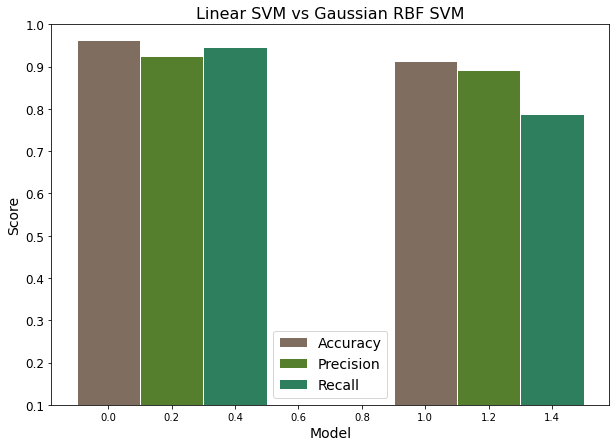

In [ ]:
barWidth = 0.2

accuracies = [scores_1[0], scores_rbf[0]]
precisions = [scores_1[1], scores_rbf[1]]
recalls = [scores_1[2], scores_rbf[2]]

r1 = np.arange(len(accuracies))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.figure(figsize=(10,7))

#Plot
plt.bar(r1, accuracies, color='#7f6d5f', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precisions, color='#557f2d', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recalls, color='#2d7f5e', width=barWidth, edgecolor='white', label='Recall')
 

plt.title('Linear SVM vs Gaussian RBF SVM', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.yticks(fontsize=12)
plt.ylim([0.1,1.0])
 

plt.legend(fontsize=14)
plt.show()

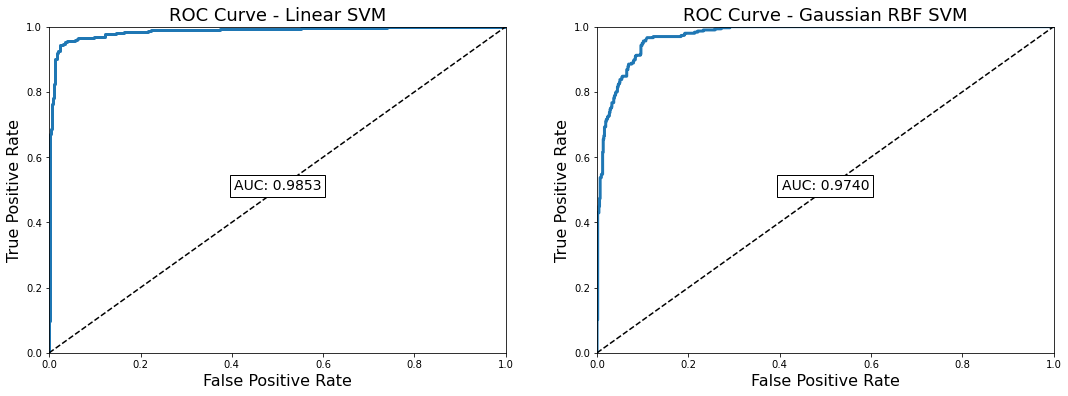

In [ ]:
def plot_roc_curve(model, x_test, y_test, title):
    decision_function = model.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=decision_function,
                                     pos_label=1)

    auc = roc_auc_score(y_true=y_test, y_score=decision_function)
    
    decision_function_rbf = svm_clf_rbf.decision_function(x_test)
    fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_true=y_test,
                                 y_score=decision_function_rbf,
                                 pos_label=1)

    auc_rbf = roc_auc_score(y_true=y_test, y_score=decision_function)
    plt.plot(fpr, tpr, linewidth=3, label=None)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.text(0.5, 0.5, 
             'AUC: {:.4f}'.format(auc), 
             bbox=dict(facecolor='white'), 
             horizontalalignment='center', 
             fontsize=14)
    plt.title(title, fontsize=18)


plt.figure(figsize=(18, 6))
plt.subplot(121)
plot_roc_curve(svm_clf_1, x_test, y_test, "ROC Curve - Linear SVM")
plt.subplot(122)
plot_roc_curve(svm_clf_rbf, x_test, y_test, "ROC Curve - Gaussian RBF SVM")
plt.show()
